Assignment:
- Bayes Classifier ( sklearn built in)
- Run it on iris built in dataset
- Implement from scratch function “Don’t use built-in function”: train_validate_test_split (data, labels, testRatio =0.3, valRatio =0.3)
- Draw decision boundaries (search internet)
- Implement from scratch function “Don’t use built-in function”: calculate_accuracy(predicted_y , y)
- Work in a group of two or three students


In [3]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

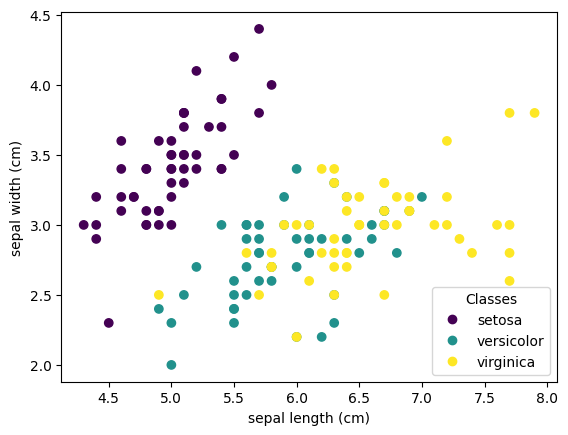

In [32]:
# importing the dataset and visualizing it
iris = datasets.load_iris()

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)


In [16]:
# splitting the dataset into data and labels
X = iris.data
y = iris.target
# concatenating X and y into a single DataFrame
df = pd.DataFrame(np.c_[X, y], columns=iris.feature_names + ['target'])
print(df.head())
print(df.describe())
print(X.shape)
print(y.shape)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

In [ ]:
def train_validate_test_split(data, labels, testRatio =0.3, valRatio =0.3):
    test_size = int(len(data) * testRatio)
    val_size = int(len(data) * valRatio)
    
    indices = np.arange(len(data))
    np.random.shuffle(indices)
    data, labels = data[indices], labels[indices]
    
    X_test, y_test = data[:test_size], labels[:test_size]
    X_val, y_val = data[test_size:test_size + val_size], labels[test_size:test_size + val_size]
    X_train, y_train = data[test_size + val_size:], labels[test_size + val_size:]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split(X, y)

In [42]:
clf = GaussianNB()

# fitting the model
clf.fit(X=X_train, y=y_train)

GaussianNB()

In [43]:
# predicting the labels

y_preds = clf.predict(X=X_test)

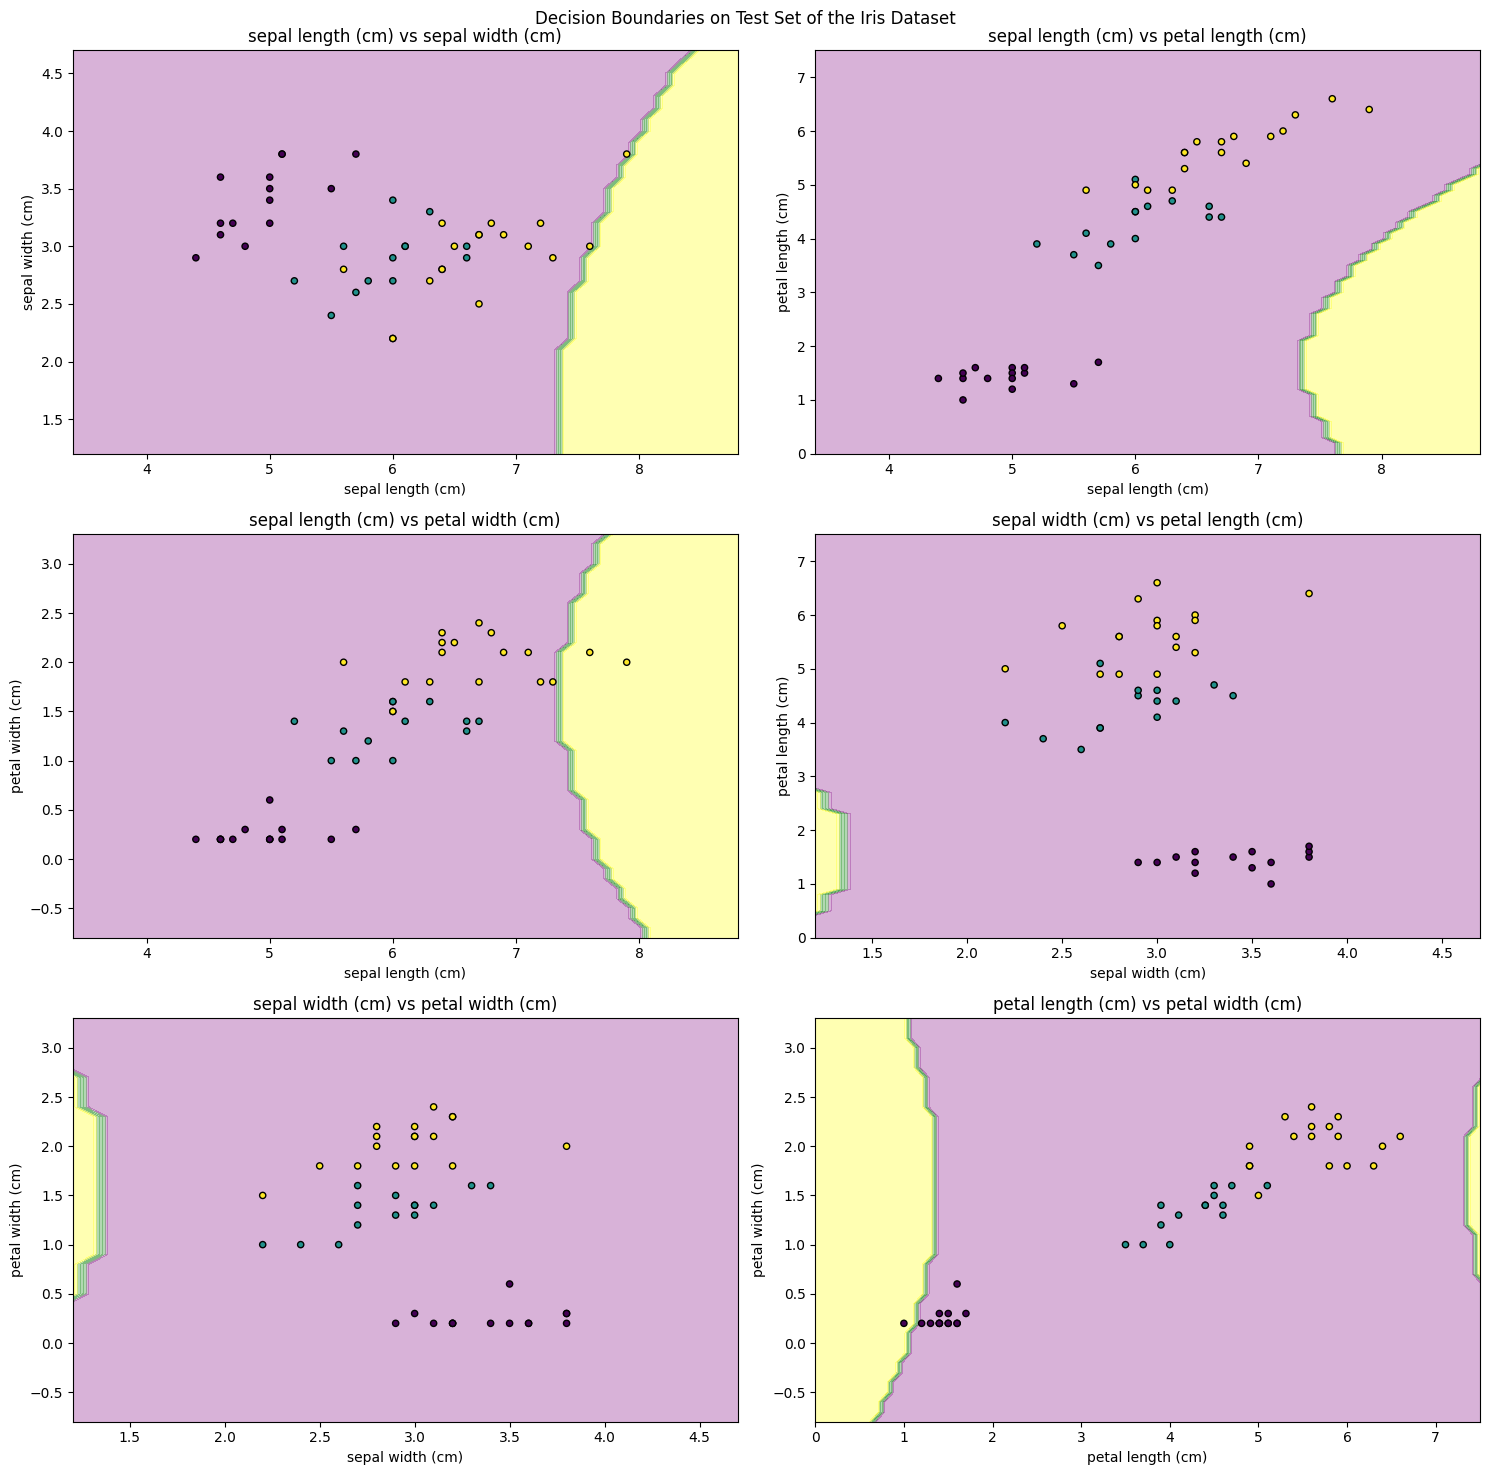

In [44]:
from matplotlib.colors import ListedColormap
# Plot decision boundaries
def plot_decision_boundaries(X, y, model, title='Decision Boundaries'):
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    features_comb = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
    for i, (f1, f2) in enumerate(features_comb):
        ax = axes[i//2, i%2]
        x_min, x_max = X[:, f1].min() - 1, X[:, f1].max() + 1
        y_min, y_max = X[:, f2].min() - 1, X[:, f2].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
                             np.arange(y_min, y_max, 0.1))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(yy.ravel())])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('purple', 'green', 'yellow')))
        ax.scatter(X[:, f1], X[:, f2], c=y, s=20, edgecolor='k', marker='o')
        ax.set_xlabel(iris.feature_names[f1])
        ax.set_ylabel(iris.feature_names[f2])
        ax.set_title(f'{iris.feature_names[f1]} vs {iris.feature_names[f2]}')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
# Since the Iris dataset has 4 features, we will use only the first two for visualization
plot_decision_boundaries(X_test, y_test, clf, title='Decision Boundaries on Test Set of the Iris Dataset')

In [46]:
def calculate_accuracy(predicted_y, y):
    correct_predictions = np.sum(predicted_y == y)
    total_predictions = len(y)
    accuracy = correct_predictions / total_predictions
    return accuracy


# Calculate the accuracy on the test set
test_accuracy = calculate_accuracy(y_preds, y_test)

print(f"Accuracy: {test_accuracy * 100:.2f}%")

Accuracy: 93.33%
